In [19]:
from statsmodels.api import datasets
iris=datasets.get_rdataset("iris")
iris.data.columns=['sepal_Length','sepal_width','petal_Length','petal_width','species']
iris.data.head()

,sepal_Length,sepal_width,petal_Length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [20]:
iris.data.dtypes

sepal_Length    float64
sepal_width     float64
petal_Length    float64
petal_width     float64
species          object
dtype: object

In [21]:
iris.data['count']=1
iris.data[['species','count']].groupby('species').count()

,count
species,
setosa,50
versicolor,50
virginica,50


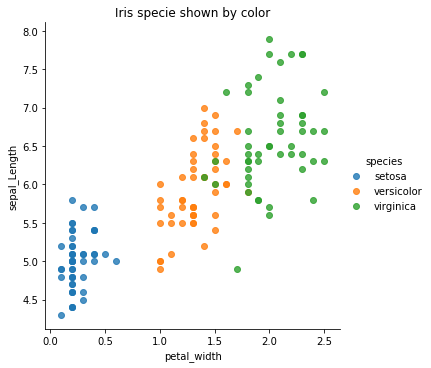

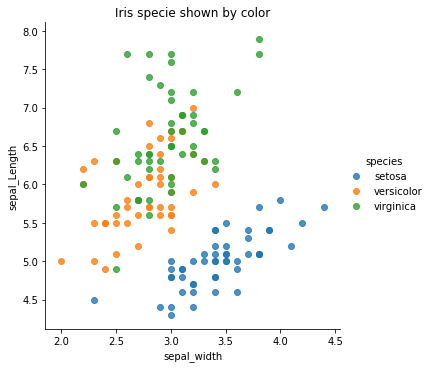

In [31]:
%matplotlib inline
def plot_iris(iris,col1,col2):
    import seaborn as sns
    import matplotlib.pyplot as plt
    sns.lmplot(x=col1,y=col2,data=iris,hue="species",fit_reg=False)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title('Iris specie shown by color')
    plt.show()
plot_iris(iris.data,'petal_width','sepal_Length')
plot_iris(iris.data,'sepal_width','sepal_Length')

In [32]:
from sklearn.preprocessing import scale
import pandas as pd
num_cols=['sepal_Length','sepal_width','petal_Length','petal_width']
iris_scaled=scale(iris.data[num_cols])
iris_scaled=pd.DataFrame(iris_scaled,columns=num_cols)
print(iris_scaled.describe().round(3))

       sepal_Length  sepal_width  petal_Length  petal_width
count       150.000      150.000       150.000      150.000
mean         -0.000       -0.000        -0.000       -0.000
std           1.003        1.003         1.003        1.003
min          -1.870       -2.434        -1.568       -1.447
25%          -0.901       -0.592        -1.227       -1.184
50%          -0.053       -0.132         0.336        0.133
75%           0.675        0.559         0.763        0.791
max           2.492        3.091         1.786        1.712


In [34]:
levels={'setosa':0,'versicolor':1,'virginica':2}
iris_scaled['species']=[levels[x] for x in iris.data['species']]
iris_scaled.head()

,sepal_Length,sepal_width,petal_Length,petal_width,species
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0


# split the data into a training and test set by bernoulli sampling

In [56]:
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(3456)
iris_split=train_test_split(np.asmatrix(iris_scaled),test_size=75)
iris_train_features=iris_split[0][:, :4]
iris_train_labels=np.ravel(iris_split[0][:, 4])
iris_test_features=iris_split[1][:, :4]
iris_test_labels=np.ravel(iris_split[1][:, 4])
print(iris_train_features.shape)
print(iris_train_labels.shape)
print(iris_test_features.shape)
print(iris_test_labels.shape)

(75, 4)
(75,)
(75, 4)
(75,)


# Define and train the KNN model

In [58]:
from sklearn.neighbors import KNeighborsClassifier
KNN_mod=KNeighborsClassifier(n_neighbors=3)
KNN_mod.fit(iris_train_features,iris_train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

# Now we want to test the model

In [59]:
iris_test=pd.DataFrame(iris_test_features,columns=num_cols)
iris_test['predicted']=KNN_mod.predict(iris_test_features)
iris_test['correct']=[1 if x==z else 0 for x,z in zip(iris_test['predicted'],iris_test_labels)]
accuracy=100.0*float(sum(iris_test['correct']))/float(iris_test.shape[0])
print(accuracy)

96.0


'Done'

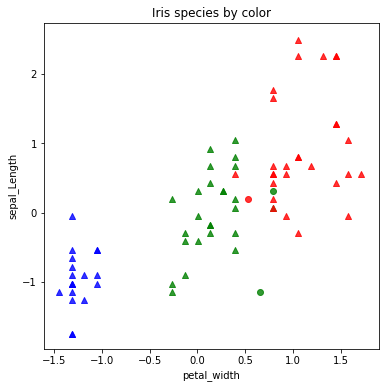

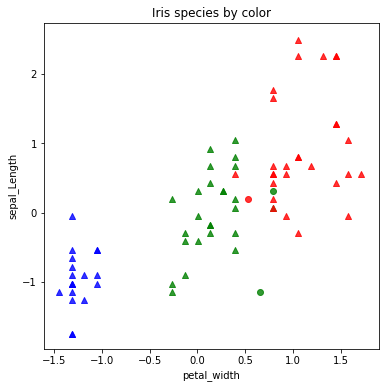

In [60]:
levels={0:'setosa',1:'versicolor',2:'virginica'}
iris_test['species']=[levels[x] for x in iris_test['predicted']]
markers={1:'^',0:'o'}
colors={'setosa':'blue','versicolor':'green','virginica':'red'}
def plot_shapes(df,col1,col2,markers,colors):
    import matplotlib.pyplot as plt
    import seaborn as sns
    ax=plt.figure(figsize=(6,6)).gca()
    for m in markers:
        for c in colors:
            df_temp=df[(df['correct']==m)&(df['species']==c)]
            sns.regplot(x=col1,y=col2,data=df_temp,fit_reg=False,scatter_kws={'color':colors[c]},marker=markers[m],ax=ax)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title('Iris species by color')
    return 'Done'
plot_shapes(iris_test,'petal_width','sepal_Length',markers,colors)
plot_shapes(iris_test,'petal_width','sepal_Length',markers,colors)